<a href="https://colab.research.google.com/github/disha2sinha/Movie-Recommendation-System/blob/master/Popularity_Based_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES:**

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#https://drive.google.com/file/d/1HcaON_5Qz-bfqlRyDgVWfdS4bD0hQ0Z3/view?usp=sharing

In [3]:
id='1QV_0o-7HQG75hCDyjrgJ2iII0_FdO2wa'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MoviesData.csv')  
movies_data = pd.read_csv('MoviesData.csv',engine='python',index_col=0)
movies_data.head()

,index,tmdbId,title,release_year,release_day,genres,original_language,runtime,content,production_companies,budget,revenue,production_countries,status,popularity,vote_average,vote_count,keywords,cast,director,rating_count,mean_rating
0,0,41439,Saw: The Final Chapter,2010,Thursday,Horror|Crime,English,90.0,As a deadly battle rages over Jigsaw's brutal ...,Lionsgate|Twisted Pictures|Serendipity Product...,20000000,136150434.0,Canada|United States of America,Released,16.626655,5.8,758.0,"['survivor', 'violence', 'self help guru', 'tr...",Tobin Bell|Costas Mandylor|Betsy Russell|Cary ...,Kevin Greutert,341.0,4.054252
1,1,11185,"See No Evil, Hear No Evil",1989,Friday,Crime|Comedy,English,103.0,A murder takes place in the shop of David Lyon...,TriStar Pictures,18000000,46908987.0,United States of America,Released,17.367336,6.4,220.0,"['deafness', 'blindness and impaired vision', ...",Richard Pryor|Gene Wilder|Joan Severance|Kevin...,Arthur Hiller,324.0,4.256173
2,2,321258,The Boy,2016,Friday,Horror|Mystery|Thriller,English,97.0,"A nanny, working for a family whose son has ju...",Lakeshore Entertainment|Vertigo Entertainment|...,10000000,64188367.0,United States of America|China|Canada,Released,17.028854,5.8,1133.0,"['suicide', 'england', 'fire', 'country house'...",Lauren Cohan|Rupert Evans|James Russell|Jim No...,William Brent Bell,311.0,4.487138
3,3,13342,Fast Times at Ridgemont High,1982,Friday,Comedy,English,90.0,Follows a group of high school students growin...,Universal Pictures|Refugee Films,4500000,27092880.0,United States of America,Released,14.658885,7.0,330.0,"['sex', 'based on novel', 'nudity', 'friendshi...",Sean Penn|Jennifer Jason Leigh|Judge Reinhold|...,Amy Heckerling,304.0,4.138158
4,4,2503,The Bourne Ultimatum,2007,Friday,Action|Drama|Mystery|Thriller,English,115.0,Bourne is brought out of hiding once again by ...,Universal Pictures|The Kennedy/Marshall Compan...,70000000,442824138.0,Germany|United States of America,Released,18.173269,7.3,2938.0,"['paris', 'corruption', 'madrid', 'assassin', ...",Matt Damon|Julia Stiles|David Strathairn|Scott...,Paul Greengrass,291.0,4.221649


In [4]:
movies_data.drop('index',axis=1,inplace=True)

In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 0 to 9080
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                9081 non-null   int64  
 1   title                 9081 non-null   object 
 2   release_year          9081 non-null   int64  
 3   release_day           9081 non-null   object 
 4   genres                9046 non-null   object 
 5   original_language     9079 non-null   object 
 6   runtime               9081 non-null   float64
 7   content               9069 non-null   object 
 8   production_companies  8417 non-null   object 
 9   budget                9081 non-null   int64  
 10  revenue               9081 non-null   float64
 11  production_countries  8787 non-null   object 
 12  status                9081 non-null   object 
 13  popularity            9081 non-null   float64
 14  vote_average          9081 non-null   float64
 15  vote_count           

# **POPULARITY BASED RECOMMENDATION SYSTEM :**

In [6]:
movies_data[['vote_count','vote_average','rating_count','mean_rating','popularity']].describe()

,vote_count,vote_average,rating_count,mean_rating,popularity
count,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000
mean,438.957494,6.362163,9.246999,2.025622,7.267953
std,996.171464,1.038804,23.946565,1.731353,9.372549
min,0.000000,0.000000,0.000000,0.000000,0.000004
25%,29.000000,5.800000,0.000000,0.000000,2.954184
50%,96.000000,6.500000,1.000000,2.666667,6.417420
75%,365.000000,7.000000,6.000000,3.555556,9.861672
max,14075.000000,10.000000,341.000000,5.000000,547.488298


**WEIGHTED AVERAGE FOR EACH MOVIES AVERAGE RATINGS :**

Weighted Ratings: 
>              W =   Rv + Cm
>                   ---------
                     v+m

R= average rating for the movie as a number from 0 to 10

v= number of votes for the movie

m= minimum votes required to be listed in Top(here 2000)

C=the mean vote across whole report


In [7]:
R=movies_data['vote_average']
v=movies_data['vote_count']
C=movies_data['vote_average'].mean()
m=2000

In [8]:
movies_data['weighted_votes']=(R*v+C*m)/(v+m)
movies_data[['title','weighted_votes']].sort_values('weighted_votes',ascending=False).head(20)

,title,weighted_votes
186,The Shawshank Redemption,8.087210
1108,The Dark Knight,8.028385
1708,Fight Club,7.968122
2135,The Godfather,7.967139
2639,Pulp Fiction,7.936769
996,Inception,7.883784
867,Forrest Gump,7.837758
22,Interstellar,7.836432
7678,The Lord of the Rings: The Return of the King,7.760114
3104,The Empire Strikes Back,7.740426


In [9]:
R1=movies_data['mean_rating']
v1=movies_data['rating_count']
C1=movies_data['mean_rating'].mean()
m1=movies_data['rating_count'].quantile(0.95)
m1

47.0

In [10]:
movies_data['weighted_ratings']=(R1*v1+C1*m1)/(v1+m1)
movies_data[['title','weighted_ratings']].sort_values('weighted_ratings',ascending=False).head(20)

,title,weighted_ratings
2,The Boy,4.163978
26,Philadelphia,4.019045
1,"See No Evil, Hear No Evil",3.973596
8,Sin City,3.935410
23,Edge of Tomorrow,3.926227
4,The Bourne Ultimatum,3.916285
13,Return of the Jedi,3.869757
10,Twelve Monkeys,3.863716
3,Fast Times at Ridgemont High,3.855283
6,The Proposition,3.851975


**ASSIGNING SCORES TO THE MOVIES BY GIVING 45% IMPORTANCE TO WEIGHTED AVERAGE OF VOTES + 45% IMPORTANCE TO POPULARITY + 10% TO WEIGHTED AVERAGE OF RATINGS**

In [11]:
scaler=MinMaxScaler()
movies_data[['weighted_votes','weighted_ratings','popularity']]=scaler.fit_transform(movies_data[['weighted_votes','weighted_ratings','popularity']])
movies_data['score']=movies_data['weighted_votes']*0.45 + movies_data['weighted_ratings']*0.1+movies_data['popularity']*0.45
movies_data[['title','weighted_votes','weighted_ratings','popularity','score']].sort_values('score',ascending=False).head(10)

,title,weighted_votes,weighted_ratings,popularity,score
5899,Minions,0.388873,0.098883,1.000000,0.634881
7,Big Hero 6,0.771829,0.752738,0.390602,0.598368
1108,The Dark Knight,0.978834,0.240321,0.224968,0.565743
2639,Pulp Fiction,0.945869,0.170780,0.257449,0.558571
186,The Shawshank Redemption,1.000000,0.616283,0.094332,0.554077
356,Gone Girl,0.794702,0.383496,0.282748,0.523202
121,Deadpool,0.697180,0.501842,0.343132,0.518324
22,Interstellar,0.909767,0.785113,0.058839,0.514384
1708,Fight Club,0.957150,0.122264,0.116659,0.495441
180,Guardians of the Galaxy,0.840524,0.627187,0.097338,0.484757


**ONLY MOVIES HAVING SCORE ABOVE A THRESHOLD VALUE CONSIDERED POPULAR :**

In [12]:
movies_data.score.describe()

count    9081.000000
mean        0.198219
std         0.036777
min         0.030272
25%         0.181857
50%         0.187246
75%         0.201982
max         0.634881
Name: score, dtype: float64

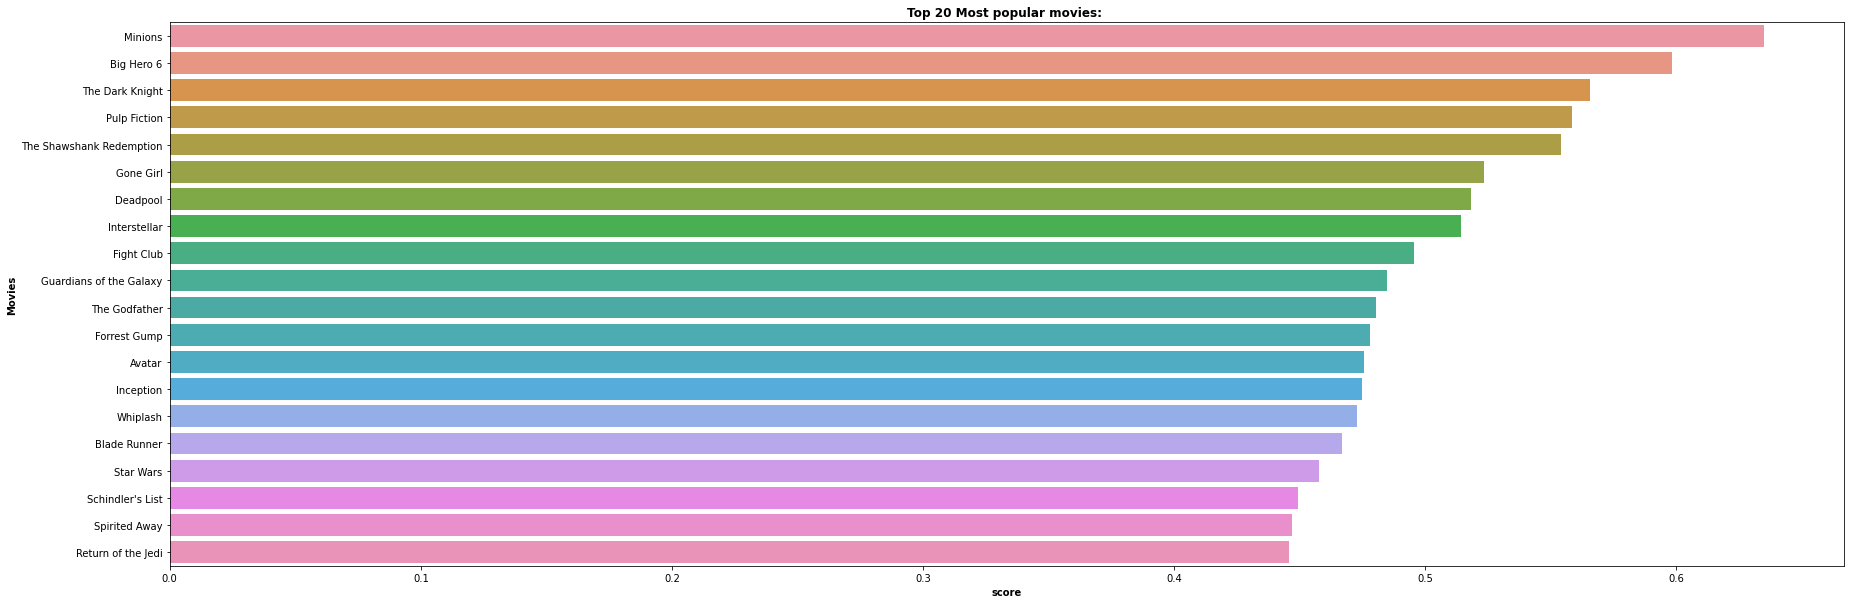

In [13]:
movies_data['profit']=movies_data['budget']-movies_data['revenue']
popular_movies=movies_data[['tmdbId','title','budget','profit','score','release_year','release_day','genres','production_countries','production_companies','original_language','runtime','content','status','cast','director']].sort_values('score',ascending=False).reset_index(drop=True)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=popular_movies['score'].head(20),y=popular_movies['title'].head(20))
plt.title('Top 20 Most popular movies: ',weight='bold')
plt.xlabel('score',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('PopularMovies.jpg')

In [14]:
popular_movies.shape

(9081, 16)

In [15]:
popular_movies[['title','genres','score']].head(20)

,title,genres,score
0,Minions,Family|Animation|Adventure|Comedy,0.634881
1,Big Hero 6,Adventure|Family|Animation|Action|Comedy,0.598368
2,The Dark Knight,Drama|Action|Crime|Thriller,0.565743
3,Pulp Fiction,Thriller|Crime,0.558571
4,The Shawshank Redemption,Drama|Crime,0.554077
5,Gone Girl,Mystery|Thriller|Drama,0.523202
6,Deadpool,Action|Adventure|Comedy,0.518324
7,Interstellar,Adventure|Drama|Science Fiction,0.514384
8,Fight Club,Drama,0.495441
9,Guardians of the Galaxy,Action|Science Fiction|Adventure,0.484757


In [16]:
popular_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9081 entries, 0 to 9080
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                9081 non-null   int64  
 1   title                 9081 non-null   object 
 2   budget                9081 non-null   int64  
 3   profit                9081 non-null   float64
 4   score                 9081 non-null   float64
 5   release_year          9081 non-null   int64  
 6   release_day           9081 non-null   object 
 7   genres                9046 non-null   object 
 8   production_countries  8787 non-null   object 
 9   production_companies  8417 non-null   object 
 10  original_language     9079 non-null   object 
 11  runtime               9081 non-null   float64
 12  content               9069 non-null   object 
 13  status                9081 non-null   object 
 14  cast                  8991 non-null   object 
 15  director             

In [17]:
#popular_movies.to_csv('PopularMovies.csv')
#file = drive.CreateFile({'parents':[{u'id': '1LxtvFIt9kDw8caxwrYh26MfK2ZcCiJaf'}]}) 
#file.SetContentFile("PopularMovies.csv")
#file.Upload()